In [446]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [447]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sinal(z):
    return 1 if z > 0.5 else 0

In [448]:
def calculo_accuracy(X, Y, w):
    correct_predictions = 0
    for i in range(len(X)):
        prediction = sigmoid(np.dot(w, X[i]))
        if sinal(prediction) == Y[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(X)
    return accuracy

In [449]:
def calcular_erro(y,Y, p_chapeu):
    
    erro = 0
    for n in range(len(Y)):
        erro -= (Y * np.log(p_chapeu) + (1 - Y) * np.log(1 - p_chapeu))
    return erro / N

In [450]:
def calculo_S(p_chapeu, Y, X, ordem):
    N = len(X)
    S_aux = []
    
    for n in range(1):
        S_aux.append((p_chapeu - Y[ordem]) * np.array([(np.dot(X[l], X[ordem]))**2 for l in range(N)]))
    S = np.sum(S_aux,axis=0)
    print(S)
    print(Y[ordem])
    k=np.array([(np.dot(X[l], X[ordem]))**2 for l in range(N)])
    print(k)
    print((p_chapeu-1)*k)
    k=(p_chapeu-1)*k
    return S

In [451]:
def calculo_Sn(p_chapeu, Y, X, X_batch):
    N = len(X)
    S_aux = np.zeros(N)  # Iniciando S_aux com zeros para acumulação

    for n in range(len(X_batch)):
        error = p_chapeu[n] - Y[n]
        dot_products = np.dot(X, X[n])^2
        S_aux += error * dot_products

    S = S_aux / N
    print(len(X_batch))
    print(S)
    return S

In [452]:
def calcula_p_chapeu(alpha, X_batch, X):
    p_chapeu =[]
    N = len(X)
    p_aux = []
    for n in range(len(X_batch)):
        p_chapeu.append((alpha[n] * np.array([np.dot(X[l], X[n])**2 for l in range(N)])))
    p_chapeu = sigmoid(np.sum(p_chapeu))
    print(p_chapeu)
    return p_chapeu 

In [453]:
def batche(X, Y, percent_to_keep):
    num_to_keep = math.ceil(len(X) * percent_to_keep)
    if num_to_keep >= len(X):
        return X.copy(), Y.copy()
    indices_to_keep = np.random.choice(len(X), num_to_keep, replace=False)
    X_batch = X[indices_to_keep]
    Y_batch = Y[indices_to_keep]
    return X_batch, Y_batch       

In [466]:
# Algoritmo conforme o pseudocódigo
def CLOGMGB(X, Y, alpha, eta,batch_size,epochs):
    t=0
    E=[]
    batch_size = batch_size/len(X)
    for epoca in range(epochs):
        ordem = np.array([3,2,5])
        X_batch=[]
        X_batch.append(X[ordem[epoca]-1])
        print("Usando: ", X_batch[-1])
        p_chapeu = calcula_p_chapeu(alpha, X_batch, X)
        S = calculo_S(p_chapeu, Y, X, (ordem[epoca]-1))
        print("antes ",alpha)
        alpha = alpha - eta * S
        print("depois ",S)
        
    return E, np.array(alpha)

In [467]:
data = pd.read_csv('Ex3_D.csv', header=None)
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
Y[Y == -1] = 0
eta = 1
batch_size = 4
epochs = 3
alpha = np.zeros(len(X))
E, alpha = CLOGMGB(X, Y, alpha, eta, batch_size,epochs)
print(" alpha : ", alpha)

Usando:  [1 0 0]
0.5
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
1
[1 1 1 1 1 1]
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
antes  [0. 0. 0. 0. 0. 0.]
depois  [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
Usando:  [ 1 -1 -1]
0.9997965730219448
[-0.00020343 -0.00183084 -0.00020343 -0.00020343 -0.00081371 -0.00020343]
1
[1 9 1 1 4 1]
[-0.00020343 -0.00183084 -0.00020343 -0.00020343 -0.00081371 -0.00020343]
antes  [0.5 0.5 0.5 0.5 0.5 0.5]
depois  [-0.00020343 -0.00183084 -0.00020343 -0.00020343 -0.00081371 -0.00020343]
Usando:  [ 1 -1  0]
0.9997972751676287
[3.9991891  3.9991891  0.99979728 0.         3.9991891  0.        ]
0
[4 4 1 0 4 0]
[-0.0008109  -0.0008109  -0.00020272 -0.         -0.0008109  -0.        ]
antes  [0.50020343 0.50183084 0.50020343 0.50020343 0.50081371 0.50020343]
depois  [3.9991891  3.9991891  0.99979728 0.         3.9991891  0.        ]
 alpha :  [-3.49898567 -3.49735826 -0.49959385  0.50020343 -3.49837539  0.50020343]


In [457]:
# Relacionando o Alpha com w til
w = np.array([0, 0, 0])
for l in range(len(alpha)):
    w = w + alpha[l]*X[l]
wr = w
print("w relacionado com alpha : ", wr)


print("Acc = ",calculo_accuracy(X, Y, w))

w relacionado com alpha :  [ 8.50264455 -5.99837258 -3.99837258]
Acc =  0.3333333333333333


In [458]:
X = np.array([[1, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1]])
A=np.dot(X,X.T)

In [459]:
A

array([[3, 1, 2, 2],
       [1, 1, 1, 1],
       [2, 1, 2, 1],
       [2, 1, 1, 2]])

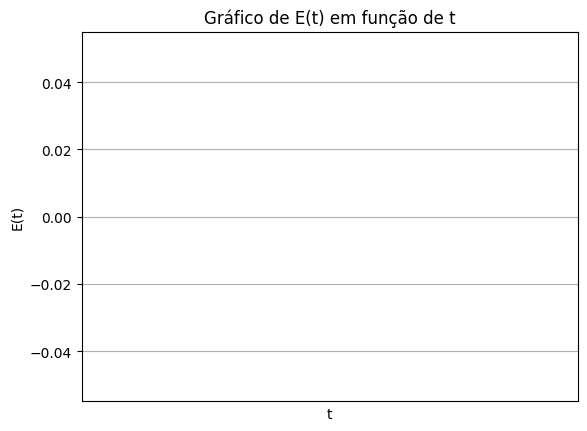

In [460]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, marker='o', linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [461]:
E

[]

In [462]:
np.dot([1,-1,-1],[1,-1,0])

2

In [364]:
np.array([0.05,0.05,0.05,0.05,0.05,0.05])-0.1*(1-0.5866)*np.array([1**2,3**2,1**2,(-1)**2,2**2,1**2])

array([ 0.00866, -0.32206,  0.00866,  0.00866, -0.11536,  0.00866])

In [193]:
import random

def selecionar_indices_aleatorios(lista, n):
    # Seleciona aleatoriamente n índices únicos da lista
    indices_aleatorios = random.sample(range(len(lista)), n)
    
    # Seleciona os elementos correspondentes a esses índices
    elementos_selecionados = [lista[i] for i in indices_aleatorios]
    
    return indices_aleatorios

# Exemplo de uso
lista = [10, 20, 30, 40, 50, 60]
n = 3
indices = selecionar_indices_aleatorios(lista, n)

for i in range(indices):
    f
print("Elementos selecionados:", elementos_selecionados)
print("Índices:", indices)


Elementos selecionados: [30, 20, 60]
Índices: [2, 1, 5]


In [ ]:
# Algoritmo conforme o pseudocódigo
def CLOGMGB(X, Y, alpha, eta,batch_size,epochs):
    t=0
    E=[]
    batch_size = batch_size/len(X)
    for epoca in range(epochs):
        ordem = np.array([3,2,5])
        X_batch=[]
        X_batch.append(X[ordem[epoca]-1])
        print("Usando: ", X_batch[-1])
        p_chapeu = calcula_p_chapeu(alpha, X_batch, X)
        S = calculo_S(p_chapeu, Y, X, (ordem[epoca]-1))
        alpha = alpha - eta * S
        E.append(calcular_erro(Y,p_chapeu))
    return E, np.array(alpha)

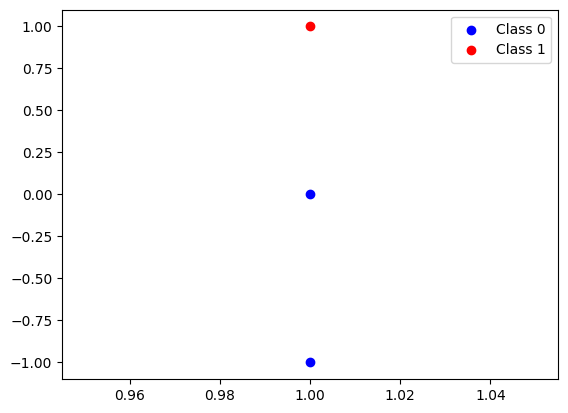

Classificação correta: False
A solução para alpha é:

[-1764.24998983  -896.99999548  -478.24999887 -1764.24998983
  -478.24999887]
O número de iterações do while foi:

2000
O erro final foi:

3.0
O vetor das probabilidades é: 

0.0


C:\Users\faust\AppData\Local\Temp\ipykernel_8532\457851208.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Função sigma
def sigma(x):
    return 1 / (1 + np.exp(-x))

# Importação dos dados
A = pd.read_csv("Ex3_D.csv").values
N, n = A.shape
B = np.ones((N, 1))
X = np.hstack((B, A[:, :2]))
X1 = X[:, 1]
X2 = X[:, 2]
Y = A[:, 2]

# Representação gráfica do dataset
In = np.where(Y == 1)
Ip = np.where(Y == 0)
plt.scatter(X1[Ip], X2[Ip], color='blue', label='Class 0')
plt.scatter(X1[In], X2[In], color='red', label='Class 1')
plt.legend()
plt.show()

# Aplicação do classificador lógico
alpha = np.zeros(N)
vec = np.zeros(N)
t = 0
s = np.zeros(N-1)
k = 0
eta = 0.5
d = 2
K = (X @ X.T) ** d

while t < 2000:
    n = np.random.randint(N)
    p = sigma(np.sum(alpha @ K[:, n]))
    bal = p - Y[n]
    s = bal * (X @ X[n, :].T) ** d
    alpha = alpha - eta * s
    t += 1

Yk = np.zeros(Y.shape)

for i in range(N):
    p_vect = sigma(np.sum(alpha[i] * K[i, :]))
    Yk[i] = 1 if p_vect > 0.5 else 0

print("Classificação correta:", np.array_equal(Yk, Y))
E = np.sum(np.abs(p - Y))
print(f"A solução para alpha é:\n\n{alpha}")
print(f"O número de iterações do while foi:\n\n{t}")
print(f"O erro final foi:\n\n{E}")
print(f"O vetor das probabilidades é: \n\n{p}")




In [432]:
# Relacionando o Alpha com w til
w = np.array([0, 0, 0])
for l in range(len(alpha)):
    w = w + alpha[l]*X[l]
wr = w
print("w relacionado com alpha : ", wr)


print("Acc = ",calculo_accuracy(X, Y, w))

w relacionado com alpha :  [-5381.99997288 -5381.99997288  2571.99998192]
Acc =  0.4


C:\Users\faust\AppData\Local\Temp\ipykernel_8532\2077356063.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
